## Confidence Intervals

The following url can be used to access an abbreviated version of responses to Stack Overflow's 2018 Developer Survey. The original Survey had ~100k respondents but the data is quite dirty so I have selected a cleaner subset of it for you to use for your assignment.

<https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv>

The provided dataset holds 14 columns of information about individuals who make less than 500k per year and who responded that they had: 

"Participated in a full-time developer training program or bootcamp"

## Part 1 - Setting the Stage

**1) Load the dataset**

In [33]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv')

In [3]:
df.head()


,Unnamed: 0,Student,Employment,UndergradMajor,DevType,YearsCoding,YearsCodingProf,ConvertedSalary,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,LanguageWorkedWith,Gender,Age,RaceEthnicity
0,62,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Data scientist or machine l...,12-14 years,6-8 years,120000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,C;F#;Haskell;Python;Scala,Male,25 - 34 years old,White or of European descent
1,73,No,Employed full-time,"A humanities discipline (ex. literature, histo...",Back-end developer;Full-stack developer;System...,0-2 years,0-2 years,36000.0,Participated in a full-time developer training...,The official documentation and/or standards fo...,Four to six months,Java;JavaScript;SQL;HTML;CSS;Bash/Shell,Male,25 - 34 years old,White or of European descent
2,127,"Yes, full-time",Employed full-time,"A business discipline (ex. accounting, finance...",Full-stack developer,3-5 years,3-5 years,59980.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,C#;JavaScript;TypeScript;HTML;CSS,Male,25 - 34 years old,East Asian
3,140,No,Employed full-time,"A social science (ex. anthropology, psychology...",Data scientist or machine learning specialist;...,9-11 years,3-5 years,70000.0,Taken an online course in programming or softw...,Questions & answers on Stack Overflow;Tapping ...,I haven’t gotten a developer job,JavaScript;Python;SQL;VBA,Male,25 - 34 years old,White or of European descent
4,153,No,Employed full-time,"Computer science, computer engineering, or sof...",Mobile developer,6-8 years,3-5 years,105000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,C;Java;JavaScript;Objective-C;PHP;Python;Ruby;...,Male,25 - 34 years old,White or of European descent


**2) Select two random samples from this dataset, one with a sample size of 20 and the other with a sample size of 200. (Use a `random_state` of `42` when selecting the samples)**

In [4]:
sample_20 = df.sample(n=20, random_state=42)

In [5]:
sample_200 = df.sample(n=200, random_state=42)

**3) Calculate and report the sample means of the `ConvertedSalary` column for both of the samples.**

In [6]:
sample_20['ConvertedSalary'].mean()

55752.2

In [7]:
sample_200['ConvertedSalary'].mean()

68551.255

**4) Both of these sample means are estimates of an underlying population value. Which sample mean do you trust more? Why? Would a non-technical audience have any idea about which of these values is more trustworthy?**

I would trust the larger of the two sample sizes due to larger representation of the population. Most non-technical people would not think of checking the sample size which generated the conclusion.

**5) Does just the point estimate (individual value of the sample mean) indicate to you anything about how much sampling error there could be with these estimates?**

Individually the point estimates do not indicate any error nor level of confidence in the estimate itself. When the difference of each is considered, an indication of error due to small sample size appears. Without further information, the magnitude of that error cannot be determined.

**6) What strategies could we use when reporting these numbers to not only report our estimates but also to give non-technical readers an idea about how far off our estimates might be due to sampling error?**



Provide an explanation of sample size skew with examples. Show sample sizes versus total population along with related ratios.

## Part 2 - Reporting CIs / MOEs along with our point estimates for more context.

**1) Calculate and report a 95% confidence interval around both of the sample means from part 1.**



In [51]:
#Sample 20
#Baysian methodology seems to be more stable
bay_inter_20 = stats.bayes_mvs(sample_20['ConvertedSalary'], alpha=.95)[0][1]
bay_inter_20

(35805.103096255356, 75699.29690374463)

In [53]:
#Sample 20
fre_inter_20 = stats.t.interval(0.95,                    # alpha (ie, confidence level)
                len(sample_20['ConvertedSalary']),                 # length of sample
                loc = np.mean(sample_20['ConvertedSalary']),      # sample mean
                scale = stats.sem(sample_20['ConvertedSalary']) # std error of the mean
                )
fre_inter_20

(35872.392631018534, 75632.00736898146)

In [82]:
#Sample 200
bay_inter_200 = stats.bayes_mvs(sample_200['ConvertedSalary'], alpha=.95)[0][1]
bay_inter_200

(60593.058804479086, 76509.45119552092)

In [56]:
#Sample 200
fre_inter_200 = stats.t.interval(0.95,                    # alpha (ie, confidence level)
                len(sample_200['ConvertedSalary']),                 # length of sample
                loc = np.mean(sample_200['ConvertedSalary']),      # sample mean
                scale = stats.sem(sample_200['ConvertedSalary']) # std error of the mean
                )
fre_inter_200

(60593.30223951439, 76509.20776048562)

**2) Which confidence interval is wider and why?**

The confidence interval of the first sample is much wider. Due to its lower sample size the standard error of our estimate is much larger causing the potential distribution of sample means to be much more spread out. A confidence interval catches 95% of this theoretical distriution of sample means so if our standard error is larger, our confidence interval will be wider as well.

**3) Report the mean and the margin of error for both of the sample means. What does the Margin of Error Represent?**

In [38]:
mean_20 = sample_20['ConvertedSalary'].mean()
mean_20

55752.2

In [34]:
#Standard Error of Mean Sample 20
sem_20 = stats.sem(sample_20['ConvertedSalary'])
sem_20

9530.275995506441

In [39]:
#Mean Sample 200
mean_200 = sample_200['ConvertedSalary'].mean()
mean_200

68551.255

In [36]:
#Standard Error of Mean Sample 200
sem_200 = stats.sem(sample_200['ConvertedSalary'])
sem_200

4035.6853799484325

The margin of error gives an idea of how far off our estimates might be (with 95% confidence). We're trying to supply a plausible range for our parameter of interest (the true average salary of bootcamp grads).

## Part 3 - Communicate the Precision of Sample Estimates Graphically

**1) Create a plot using `plt.errorbar` that compares both of the confidence intervals.** 

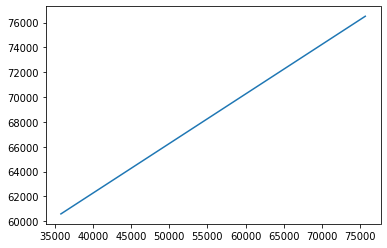

In [71]:

plt.errorbar(bay_inter_20, bay_inter_200, xerr=.9, yerr=.9, ecolor='blue')


plt.show()

**2) Create a plot using `plt.bar` that compares both of the confidence intervals.**

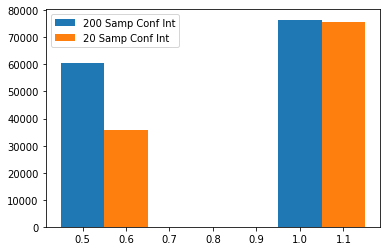

In [96]:
plt.bar([.5,1], width=.1, height=bay_inter_200[:], label='200 Samp Conf Int')
plt.bar([.6,1.1], width=.1, height=bay_inter_20[:], label='20 Samp Conf Int')
plt.legend()
plt.show()

## Part 4 - Check for Understanding







**Calculate a Confidence Interval using the entire dataset. How precise do our estimates get?**

In [97]:
stats.bayes_mvs(df['ConvertedSalary'], alpha=.95)

(Mean(statistic=73453.40420137631, minmax=(71301.16414246282, 75605.6442602898)),
 Variance(statistic=3329290148.0198884, minmax=(3153667091.5537443, 3504913204.4860325)),
 Std_dev(statistic=57700.001282667996, minmax=(56178.137742268926, 59221.864823067066)))

**What does "precision" mean in the context of statistical estimates and how is that different from "accuracy?"**

Precision refers to the closeness of measurements to each other. Accuracy refers to closeness of measurements to a standard/datum point.

**It is very common to misunderstand what is captured by a 95% confidence interval. What is the correct interpretation? ([Hint](https://www.statisticssolutions.com/misconceptions-about-confidence-intervals/))**

The confidence interval captures the likelihood a given methodology will produce a range within which the population mean  falls.

# Stretch Goals:

1) Study the relationship between t-tests and confidence intervals.
 - Find a sample mean that we have worked with and construct a 95% confidence interval around it. (find the lower and upper bounds)
 - Run a 1-sample t-test with the null hypothesis value being just barely **outside** of the confidence interval. What is the p-value?
 - Run a 1-sample t-test with the null hypothesis value being just barely **inside** of the confidence interval. What is the p-value?

  What does it mean when we say that the boundaries of the confidence interval are the boundaries of statistical significance in a 1-sample t-test?


2) Go back to our [congressional voting dataset](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records) and build confidence intervals around the means of all of the issues for a single party. Compare all of those confidence intervals graphically on a single graph. 

3) Dive deeper into the [2018 Stack Overflow Survey](https://www.kaggle.com/stackoverflow/stack-overflow-2018-developer-survey) results to see what cool things you can find.